In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_dataset = pd.read_csv('https://raw.githubusercontent.com/msht/ML_Course/main/result.csv', sep = ',', header=None)

In [3]:
raw_dataset.columns = ['Percentage', 'strain_XX', 'strain_XY','strain_YZ','stress_XX', 'stress_XY','stress_YZ']

In [4]:
raw_dataset['Percentage'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [5]:
palette = np.array(sns.color_palette("bright", 15))  #Chossing color 

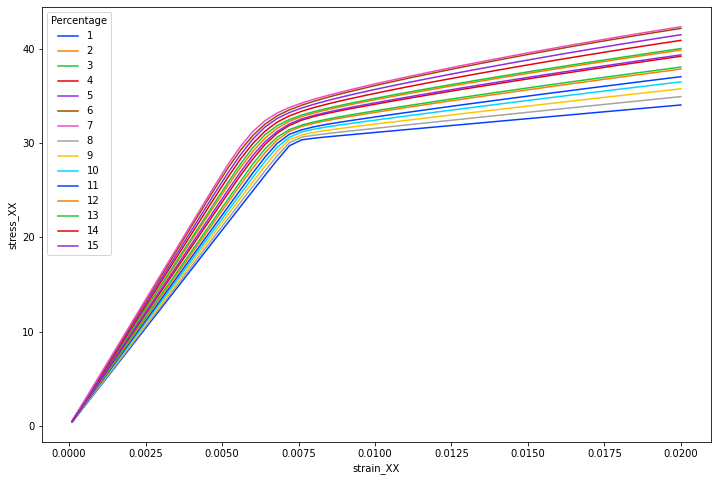

In [6]:
plt.figure(figsize = (12,8))
palette = sns.color_palette("bright", 15)  #Chossing color 
sns.lineplot( x = 'strain_XX', y = 'stress_XX', data = raw_dataset, palette=palette, hue = 'Percentage', legend = 'full')
plt.show()

**Split Data into X & Y**

In [7]:
X = raw_dataset.iloc[:,0:4]
Y = raw_dataset.iloc[:,4:7]

In [8]:
X

,Percentage,strain_XX,strain_XY,strain_YZ
0,1,0.0001,-0.000034,-1.499200e-08
1,1,0.0002,-0.000068,-3.182700e-08
2,1,0.0012,-0.000412,-1.923900e-07
3,1,0.0016,-0.000549,-2.567300e-07
4,1,0.0020,-0.000687,-3.219800e-07
...,...,...,...,...
745,15,0.0184,-0.010528,3.256300e-04
746,15,0.0188,-0.010827,3.360400e-04
747,15,0.0192,-0.011128,3.464400e-04
748,15,0.0196,-0.011430,3.568800e-04


In [9]:
Y

,stress_XX,stress_XY,stress_YZ
0,0.41647,0.002704,0.000003
1,0.83108,0.002189,-0.000001
2,4.98100,0.004208,0.000003
3,6.64090,0.003861,0.000011
4,8.30060,0.003834,0.000011
...,...,...,...
745,38.58800,0.006364,0.000409
746,38.77500,0.006454,0.000419
747,38.96000,0.006539,0.000428
748,39.14400,0.006621,0.000433


**Pre-Processing of Dataset**

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [11]:
# Applying Transformation
scaler_X = scaler.fit(X)
scaled_X = scaler_X.transform(X)

In [12]:
# Applying Transformation
scaler_Y = scaler.fit(Y)
scaled_Y = scaler_Y.transform(Y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, scaled_Y, test_size = 0.01, random_state = 10)

In [14]:
len(X_train)

742

**ANN Regression**

In [15]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [16]:
model=Sequential([
    Dense(10, input_dim=4,activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(3, activation='tanh')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

In [19]:
# Epochs = Number of Iterations, Batch Size = number of samples per execution
# validation_split = 10% of overall training samples to validate algorithm parallely to avoid overfitting of algorithm
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=500, shuffle=True, verbose=2)

Epoch 1/500
21/21 - 14s - loss: 0.1996 - accuracy: 0.1364 - val_loss: 0.1108 - val_accuracy: 0.0667
Epoch 2/500
21/21 - 0s - loss: 0.0928 - accuracy: 0.2459 - val_loss: 0.0749 - val_accuracy: 0.3733
Epoch 3/500
21/21 - 0s - loss: 0.0718 - accuracy: 0.4903 - val_loss: 0.0680 - val_accuracy: 0.5067
Epoch 4/500
21/21 - 0s - loss: 0.0650 - accuracy: 0.5712 - val_loss: 0.0637 - val_accuracy: 0.5333
Epoch 5/500
21/21 - 0s - loss: 0.0605 - accuracy: 0.5907 - val_loss: 0.0597 - val_accuracy: 0.5467
Epoch 6/500
21/21 - 0s - loss: 0.0567 - accuracy: 0.5937 - val_loss: 0.0564 - val_accuracy: 0.5467
Epoch 7/500
21/21 - 0s - loss: 0.0531 - accuracy: 0.6027 - val_loss: 0.0532 - val_accuracy: 0.5467
Epoch 8/500
21/21 - 0s - loss: 0.0496 - accuracy: 0.6027 - val_loss: 0.0500 - val_accuracy: 0.5467
Epoch 9/500
21/21 - 0s - loss: 0.0462 - accuracy: 0.6267 - val_loss: 0.0466 - val_accuracy: 0.6533
Epoch 10/500
21/21 - 0s - loss: 0.0426 - accuracy: 0.7256 - val_loss: 0.0434 - val_accuracy: 0.7067
Epoch 11

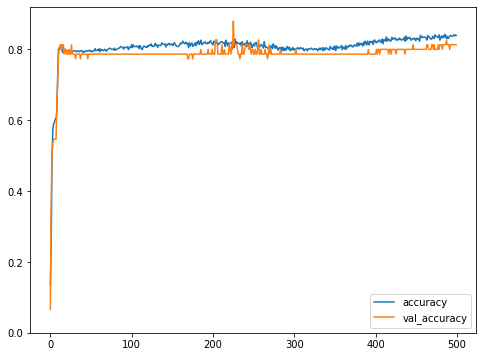

In [20]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize = (8,6))
plt.ylim(bottom=0)
plt.show()

In [21]:
predictions=model.predict(X_test, batch_size=10, verbose=0)

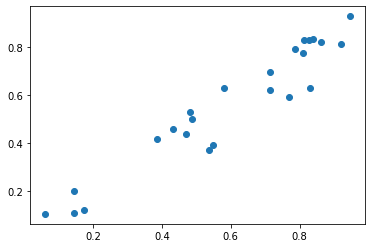

In [22]:
plt.scatter(Y_test, predictions)

In [23]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.7973907113391938

In [24]:
sigma=scaler_Y.inverse_transform(predictions)
print(sigma)

[[ 3.9347260e+01  6.7957002e-03 -1.5750123e-04]
 [ 3.5157257e+01  6.5254522e-03 -1.7538834e-04]
 [ 3.5165234e+01  4.6487828e-03 -2.2631360e-05]
 [ 2.9556715e+01  5.7254690e-03  3.9214596e-05]
 [ 3.3563950e+01  4.5327521e-03 -5.1745916e-05]
 [ 3.5311882e+01  5.6688786e-03  2.5883241e-04]
 [ 5.0564203e+00  3.3170115e-03  7.9433987e-05]
 [ 5.4782538e+00  2.7826224e-03 -9.1609923e-05]]


In [25]:
np.savetxt('sigma.csv',sigma, delimiter=',')

In [26]:
model.save('NNforclass.h5')

In [27]:
model.save_weights('NNforclass.h5')

In [28]:
model.get_weights()

[array([[ 0.51608586, -0.11130242, -0.27857223,  0.59307283,  0.2717671 ,
         -0.3102503 , -0.59785897, -0.37558058,  0.5186618 , -0.13689561],
        [ 0.11060531, -0.49699733, -2.0560496 , -0.15007122,  1.1131632 ,
          0.8974289 ,  0.07104196,  0.25060186,  0.39092565, -0.2753281 ],
        [ 0.47045323, -0.41387087,  0.88643193, -0.3266113 ,  0.66349065,
          0.07531397,  0.552894  ,  0.32793805,  0.03000438,  0.8435872 ],
        [ 0.37715694, -0.20272525, -0.1539026 ,  0.04710579,  0.35593057,
         -0.02833671,  0.4539346 ,  0.46027482, -0.79903066,  0.25366414]],
       dtype=float32),
 array([-0.3014475 ,  0.2861208 , -0.17458744,  0.00813179,  0.4896979 ,
        -0.25680682, -0.06429831,  0.18130921,  0.01779055, -0.20356694],
       dtype=float32),
 array([[ 0.08646914,  0.32598025,  0.6226307 ,  0.18982121,  0.03658572,
         -0.68077624, -0.26005998,  0.01179801, -0.45496583,  0.29835448],
        [ 0.31965998,  0.20553662, -0.57214177, -0.4052905 , 

**Let's try to predict a stress-strain curve**

In [47]:
predict_dataset = raw_dataset[raw_dataset['Percentage']==5]

In [48]:
X_predict = (predict_dataset.iloc[:,0:4])
Y_predict = (predict_dataset.iloc[:,4:7])

In [49]:
predScaler_X = scaler.fit(X_predict)
scaled_X_predict = predScaler_X.transform(X_predict)

In [50]:
new_predictions=model.predict(scaled_X_predict, batch_size=10, verbose=0)

In [51]:
predScaler_Y = scaler.fit(Y)
predSigma = predScaler_Y.inverse_transform(new_predictions)

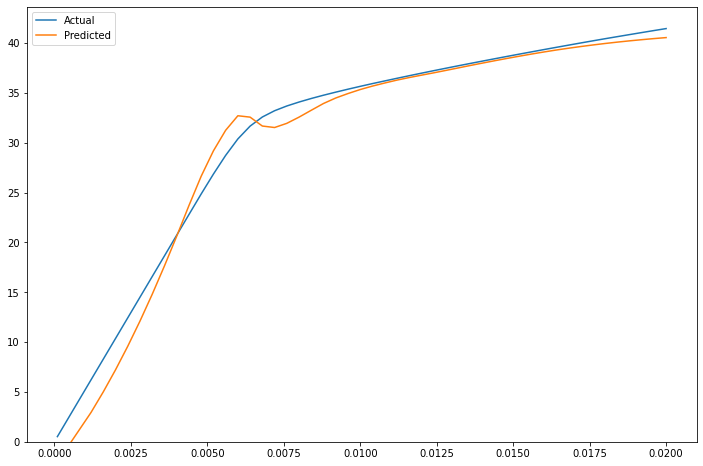

In [52]:
plt.figure(figsize = (12,8))
plt.plot(X_predict.iloc[:,1],Y_predict.iloc[:,0])
plt.plot(X_predict.iloc[:,1],predSigma[:,0])
plt.legend(['Actual','Predicted'])
plt.ylim(bottom=0)
plt.show()